<a href="https://colab.research.google.com/github/st064560/JB-tasks/blob/master/site_conv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/Shopping stage - CID.csv')
df.head(10)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Этап покупки,Cid,Дата,Сеансы
0,(other),(other),(other),29182538
1,ALL_VISITS,104443087.1585809236,20200402,107
2,NO_SHOPPING_ACTIVITY,913930248.1549569160,20190304,98
3,ALL_VISITS,355900195.1549635786,20190321,59
4,NO_SHOPPING_ACTIVITY,104443087.1585809236,20200402,56
5,NO_CART_ADDITION,104443087.1585809236,20200402,51
6,PRODUCT_VIEW,104443087.1585809236,20200402,51
7,ALL_VISITS,289013726.1549253662,20190204,40
8,NO_SHOPPING_ACTIVITY,289013726.1549253662,20190204,40
9,ALL_VISITS,71868501.1569838721,20191001,39


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 4 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   Этап покупки  object
 1   Cid           object
 2   Дата          object
 3   Сеансы        int64 
dtypes: int64(1), object(3)
memory usage: 91.6+ MB


In [7]:

df.head(5)

,Этап покупки,Cid,Дата,Сеансы
2,NO_SHOPPING_ACTIVITY,913930248.1549569160,20190304,98
3,ALL_VISITS,355900195.1549635786,20190321,59
4,NO_SHOPPING_ACTIVITY,104443087.1585809236,20200402,56
5,NO_CART_ADDITION,104443087.1585809236,20200402,51
6,PRODUCT_VIEW,104443087.1585809236,20200402,51


In [10]:
date = df['Дата']


df['Дата'] = pd.to_datetime(date, format='%Y%m%d')

df.head(5)

,Этап покупки,Cid,Дата,Сеансы
2,NO_SHOPPING_ACTIVITY,913930248.1549569160,2019-03-04,98
3,ALL_VISITS,355900195.1549635786,2019-03-21,59
4,NO_SHOPPING_ACTIVITY,104443087.1585809236,2020-04-02,56
5,NO_CART_ADDITION,104443087.1585809236,2020-04-02,51
6,PRODUCT_VIEW,104443087.1585809236,2020-04-02,51


In [11]:
df['Этап покупки'].value_counts()

ALL_VISITS                        1121527
NO_SHOPPING_ACTIVITY               853611
PRODUCT_VIEW                       286742
NO_CART_ADDITION                   240754
ADD_TO_CART                         75705
CART_ABANDONMENT                    54655
ADD_TO_CART_WITH_VIEW               51441
NO_PRODUCT_VIEW                     33833
ADD_TO_CART_WITHOUT_VIEW            30345
CHECKOUT                            30290
CHECKOUT_1                          28175
CHECKOUT_WITH_CART_ADDITION         26182
CHECKOUT_3                          22125
CHECKOUT_4                          21527
CHECKOUT_2                          20472
CHECKOUT_ABANDONMENT                20182
CHECKOUT_5                          16739
CHECKOUT_6                          12993
TRANSACTION                         11991
CHECKOUT_3_WITHOUT_CHECKOUT_2       10592
CHECKOUT_2_ABANDONMENT               8294
CHECKOUT_4_ABANDONMENT               6054
CHECKOUT_WITHOUT_CART_ADDITION       5738
CHECKOUT_5_ABANDONMENT            

In [35]:
all_vis = df[(df['Этап покупки'] == 'PRODUCT_VIEW')]



In [36]:
all_vis.head(5)

,Этап покупки,Cid,Дата,Сеансы
6,PRODUCT_VIEW,104443087.1585809236,2020-04-02,51
17,PRODUCT_VIEW,829878679.1557307218,2019-05-08,34
38,PRODUCT_VIEW,34003299.1591269385,2020-06-22,24
39,PRODUCT_VIEW,514097483.1548949019,2019-02-07,24
46,PRODUCT_VIEW,453062415.1561970020,2019-07-01,23


In [15]:
# импортируем библиотеки numpy и pandas
import numpy as np
import pandas as pd

# импортируем библиотеку datetime для работы с датами
import datetime
from datetime import datetime, date

# импортируем библиотеку matplotlib для построения графиков
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
all_vis = all_vis.rename(columns={"Этап покупки": "category", "Cid": "ID",  "Дата": "date",  "Сеансы": "perf"})

In [38]:
all_vis['name'] = all_vis['ID'].astype('category').cat.codes 
all_vis.head(5)

,category,ID,date,perf,name
6,PRODUCT_VIEW,104443087.1585809236,2020-04-02,51,220085
17,PRODUCT_VIEW,829878679.1557307218,2019-05-08,34,225409
38,PRODUCT_VIEW,34003299.1591269385,2020-06-22,24,222566
39,PRODUCT_VIEW,514097483.1548949019,2019-02-07,24,223937
46,PRODUCT_VIEW,453062415.1561970020,2019-07-01,23,223500


In [39]:
all_vis['name'] = all_vis['name'].astype(int)

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from operator import attrgetter
import matplotlib.colors as mcolors

In [41]:
mn = all_vis.copy()

In [42]:
mn['order_month'] = mn['date'].dt.to_period('M')
mn['cohort'] = mn.groupby('name')['date'] \
                 .transform('min') \
                 .dt.to_period('M') 

mn

,category,ID,date,perf,name,order_month,cohort
6,PRODUCT_VIEW,104443087.1585809236,2020-04-02,51,220085,2020-04,2020-04
17,PRODUCT_VIEW,829878679.1557307218,2019-05-08,34,225409,2019-05,2019-05
38,PRODUCT_VIEW,34003299.1591269385,2020-06-22,24,222566,2020-06,2020-06
39,PRODUCT_VIEW,514097483.1548949019,2019-02-07,24,223937,2019-02,2019-02
46,PRODUCT_VIEW,453062415.1561970020,2019-07-01,23,223500,2019-07,2019-07
...,...,...,...,...,...,...,...
2988012,PRODUCT_VIEW,9.99993e+08,2019-07-14,1,218508,2019-07,2019-07
2988013,PRODUCT_VIEW,9.99993e+08,2019-09-04,1,218508,2019-09,2019-07
2988014,PRODUCT_VIEW,9.99993e+08,2019-10-29,1,218508,2019-10,2019-07
2988015,PRODUCT_VIEW,9.99994e+07,2020-04-21,1,58425,2020-04,2020-04


In [43]:
mn_cohort = mn.groupby(['cohort', 'order_month']) \
              .agg(n_customers=('name', 'nunique')) \
              .reset_index(drop=False)
mn_cohort['period_number'] = (mn_cohort.order_month - mn_cohort.cohort).apply(attrgetter('n'))
mn_cohort

,cohort,order_month,n_customers,period_number
0,2019-01,2019-01,11953,0
1,2019-01,2019-02,880,1
2,2019-01,2019-03,565,2
3,2019-01,2019-04,405,3
4,2019-01,2019-05,269,4
...,...,...,...,...
185,2020-05,2020-06,570,1
186,2020-05,2020-07,201,2
187,2020-06,2020-06,14416,0
188,2020-06,2020-07,526,1


In [49]:

cohort_pivot = mn_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')

cohort_pivot
cohort_pivot.to_excel('product_view_abs.xlsx')

In [45]:
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

In [48]:
retention_matrix.to_excel('site_product_view.xlsx')

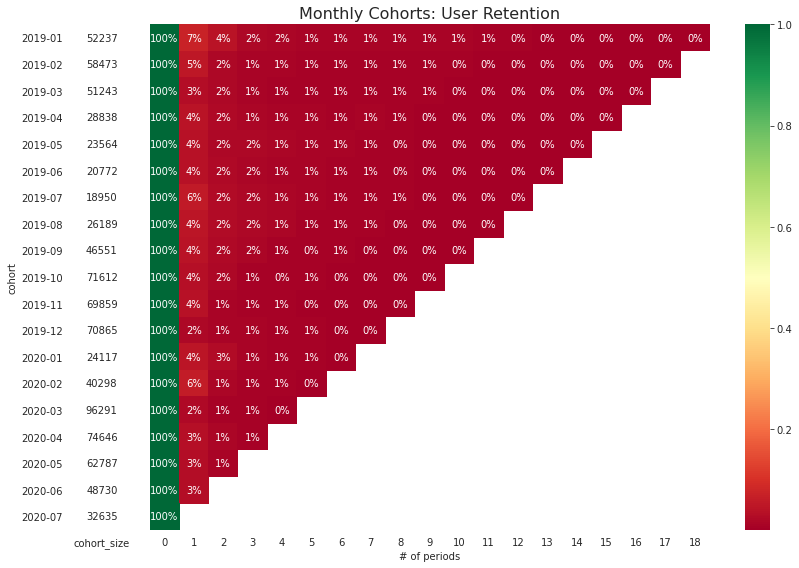

In [31]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()

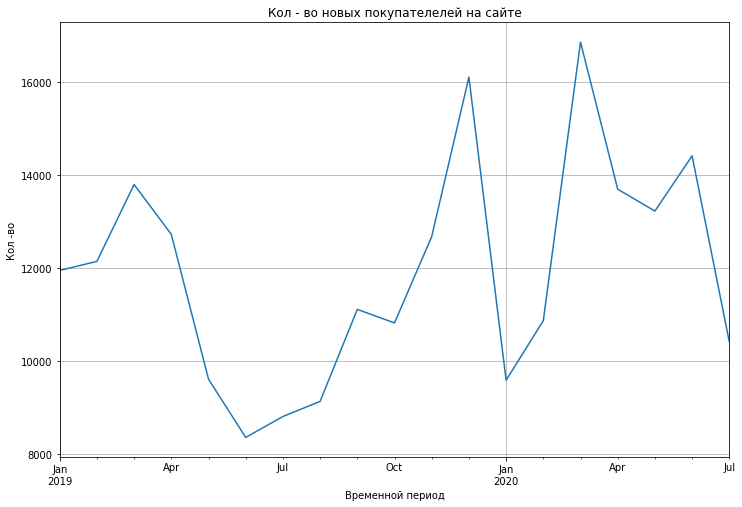

In [47]:
cohort_size.plot(title='Кол - во новых покупателелей на сайте', figsize=(12, 8))

# после вызова метода .plot() явно
# задаем подписи осей x и y


plt.xlabel('Временной период')
plt.ylabel('Кол -во')
plt.grid(True)